# Algorytm najszybszego spadku dla regresji wielomianowej

Algorytm przyjmuje zbiór danych - x oraz y i próbuje wyzaczyć funkcję wilomianową, która najlepiej przewiduje wartości y na podstawie x. Wynikiem jest wyznaczenie współczynników wielomianu.

### Importy

In [429]:
from matplotlib import pyplot as plt
import numpy as np
import random

### Początkowe współczynniki
Tworzymy losowe początkowe współczynniki wielomianu - od nich algorytm rozpocznie dopasowanie. Oraz oryginalne współczynniki na podstawie których zostanie wyznaczony zbiór danych. Aby zmienić generowany zbiór danych należy zmienić tablicę coeffs.

In [430]:
coeffs = [2, -5, 4]

k = int(input("Podaj stopień wielomianu: "))
rand_coeffs = [ random.randrange(-10, 10) for i in range(k+1) ]

### Wyznaczenie wartości wielomianu
Funkcja na podstawie współczynników oraz x wyznacza wartość y wielomianu.

In [431]:
def eval_polynomial(coeffs, x, k):
    y = 0

    for i in range(k+1):
        a = coeffs[i]*x**(k-i)
        y += a
    return y

### Wartości wielomianu z szumem
Funkcja jest analogiczna do poprzedniej - wyznacza wartość wielomianu na podstawie wpółczynników oraz x, ale dodatkowo dodaje szum do wyjściowych wartości - funkcja zostanie użyta przy generowaniu danych.

In [432]:
def eval_polynomial_jitter(coeffs, x, j, k):
    y = eval_polynomial(coeffs, x, k)
    
    interval_min = y-j
    interval_max = y+j
    
    return random.uniform(interval_min, interval_max)

### Wygenerowanie danych
Kod generuje zbiór danych. Na podstawie wartości x od -10 do 10 i losowych współczynników wielomianu generuje wartości y z szumem. Parametr j określa jak moco dane będą zaszumione

[ 9.52487237  4.31728957 -2.86004387 -4.06680766 -7.10993755 -6.3659089
  3.06102533  6.27143777  9.1380008   2.19180977  4.94214734  8.06342966
  4.58156633 -8.14890179  5.20520688 -8.59541259  3.6293768  -8.99512129
 -9.31440353 -5.42600609  7.82342339 -1.93271916 -0.81554086 -9.6994592
  5.13719864  9.45788656  3.70964434  1.27969457 -7.21538999  7.84821922
 -6.92608478 -2.35392424  8.32831454  3.61464536 -0.28674184 -2.87386245
  4.00068395  3.69653861  9.68378531 -7.278385   -7.90873047 -2.41469174
 -3.51370882  6.49444659  7.17689955 -4.77777697 -2.97134134 -0.6338146
  0.75355793 -9.65106708 -8.89989426  6.99530143  1.12347522  0.50798599
 -9.02110719  9.84011966 -6.16446615 -2.1919846   6.83936162  7.01254857
 -5.30766773  4.18034124 -9.68850209 -5.30243924  8.6308934   6.94886296
 -3.74310371 -7.17015727  0.50585453  6.5284797  -4.27368615  0.68288962
  7.23974203  8.16376838 -9.54528187 -8.04775584 -0.09982886 -6.10924399
 -9.93495247  2.91907289 -2.923125   -3.53381594  1.95

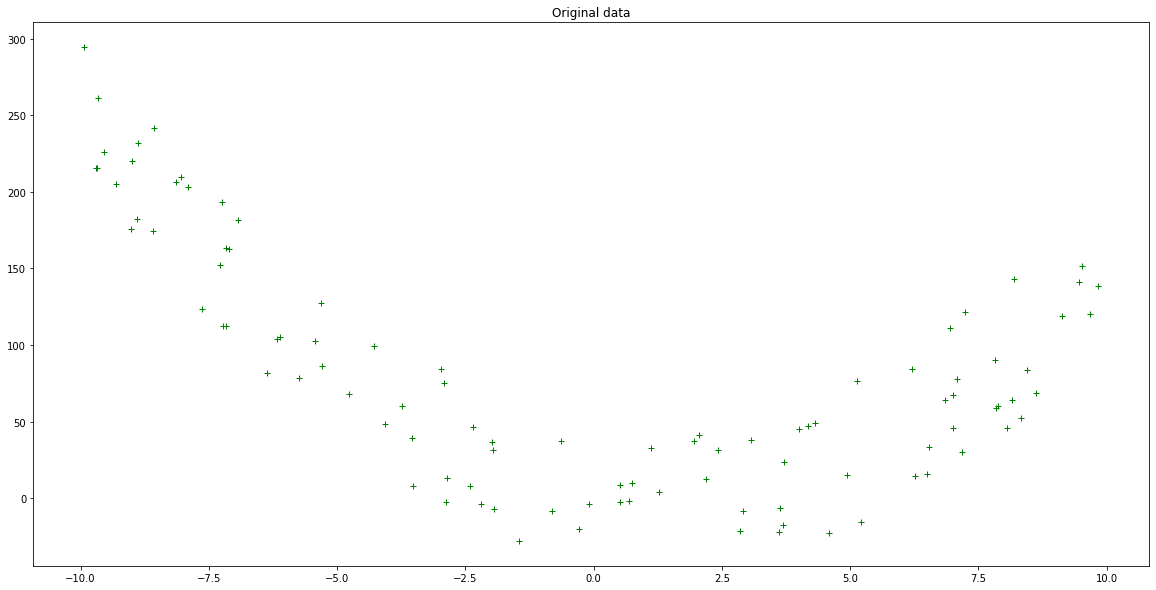

In [433]:
hundred_xs=np.random.uniform(-10,10,100)
print(hundred_xs)

j=50
x_y_pairs = []
for x in hundred_xs:
    y  = eval_polynomial_jitter(coeffs, x, j, len(coeffs)-1)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

### Funkcja straty
Do określenia jak mocno przewidziane wartości y są różne zostanie użyta kwadratowa funkcja straty.

In [434]:
def loss_mse(ys, y_bar):
    return sum((ys - y_bar)*(ys - y_bar)) / len(ys)

### Gradient
Funkcja przyjmuje współczynniki wielomianu, x, y oraz parametr prękości uczenia i wylicza za pomocą gradientu nowe wartości współczynników wielomianu.

In [435]:
def calc_gradient_poly_for_GD(coeffs, inputs_x, outputs_y, lr, k): 
    partial_derivatives = [[] for i in range(k+1)]
    new_coeffs = [None for i in range(k+1)]
        
    y_bars = eval_polynomial(coeffs, inputs_x, k)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        for i in range(k+1):
            partial = x**(k-i) * (y - y_bar)
            partial_derivatives[i].append(partial)
    
    n = len(y_bars)
    
    for i in range(k+1):
        derivative = (-2 / n) * sum(partial_derivatives[i])
        new_coeffs[i] = coeffs[i] - lr * derivative
        
    
    #update with these new coeffs:
    new_y_bar = eval_polynomial(new_coeffs, inputs_x, k)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_coeffs, new_y_bar

### Minimalizacja
Funkcja powtarza proces wyznaczenia nowych współczynników wielomianu zadaną ilość razy - epoch.

In [436]:
def gradient_descent(epochs, lr, k):
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr, k)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    #print(losses)
    return loss[0], loss[1], loss[2], losses  #(updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

### Uruchomienie
Wartości wyznaczonego wielomionu zostają wyświetlone na wykresie z porównaniem do zbioru danych.<br/>
**UWAGA** gdy otrzymamy błąd double scalars - przekroczenie wartości, należy ustawić mniejszy learning rate.

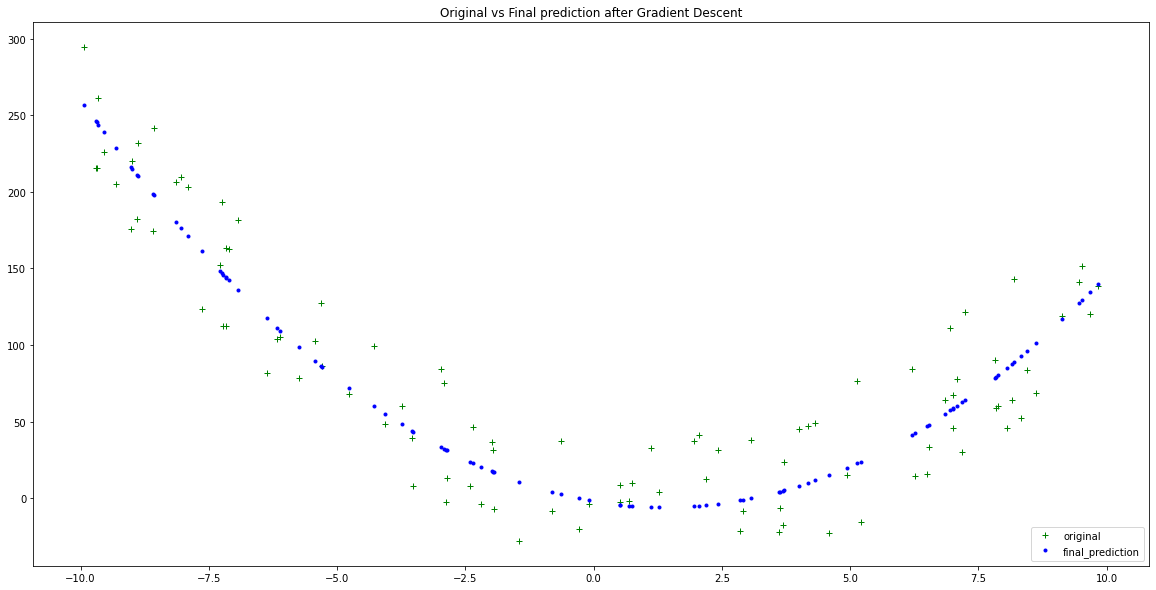

In [437]:
GD = gradient_descent(1500, 0.0001, k)

plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

### Wyznaczone współczynniki wielomianu

In [438]:
print("Początkowe współczynniki {}".format(rand_coeffs))
print("Wyznaczone współczynniki {}".format(GD[1]))
print("Oryginalne współczynniki {}".format(coeffs))

Początkowe współczynniki [-8, -1, -3]
Wyznaczone współczynniki [2.0470388756371727, -5.710817671350023, -1.943138081266058]
Oryginalne współczynniki [2, -5, 4]


### Funkcja straty
Wykres przedstawia jak zmianiała się wartość funkcji straty w kolejnych krokach algorytmu.

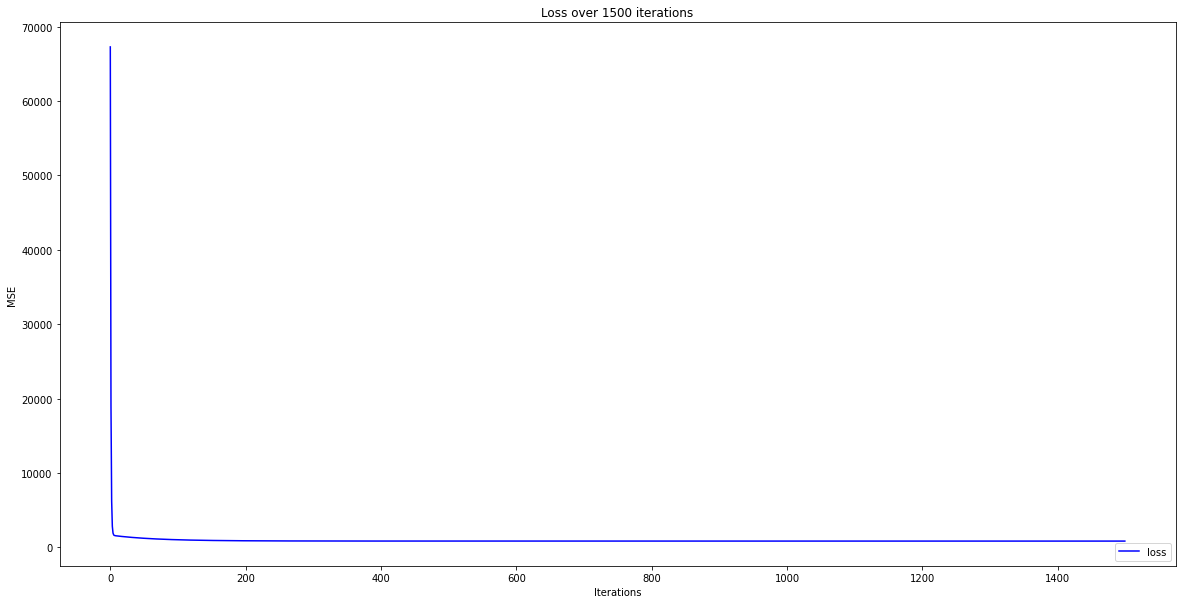

In [439]:
plt.figure(figsize=(20,10))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 1500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()